In [3]:
import pandas as pd
import seaborn as sbs

In [4]:
# Importação base de dados treino
train_dt = pd.read_csv('train.csv')
train_dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Importação base de dados treino
test_dt = pd.read_csv('test.csv')
# test_dt.head()

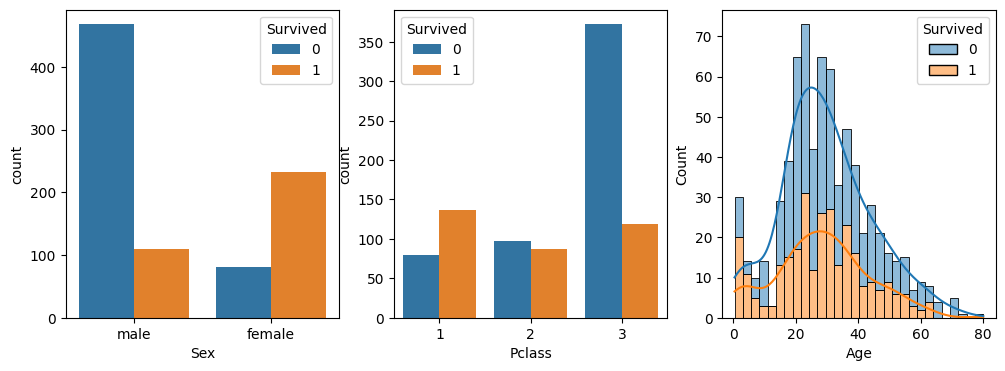

In [8]:
# Visualização de dados de quantidade de sobreviventes por 'Sex', 'Pclass' e 'Age' 
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize= (12, 4), nrows= 1, ncols= 3)
sns.countplot(data= train_dt, x= 'Sex', hue= 'Survived', ax= axs[0])
sns.countplot(data= train_dt, x= 'Pclass', hue= 'Survived', ax= axs[1])
sns.histplot(data= train_dt, x= 'Age', hue= 'Survived', bins= 30, multiple= 'stack', kde= True, ax= axs[2])
plt.show()

In [9]:
train_dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Verificação de valores nulos
train_dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# Verificação de valores nulos
#test_dt.isnull().sum()

In [15]:
# importando bibliotecas e criando uma coluna "source" para unir train_dt e test_dt
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

train_dt["source"] = "train"
test_dt["source"] = "test"

In [16]:
# Juntar os dois DataFrames
df_total = pd.concat([train_dt, test_dt], ignore_index=True)

In [17]:
# Colunas que contém valores nulos
num_cols = ["Age", "Fare"]

In [18]:
# Pipeline: padronização + imputação
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("imputer", KNNImputer(n_neighbors=5))
])

In [19]:
# Aplicando o pipeline
df_num = df_total[num_cols]
df_imputed = pipeline.fit_transform(df_num)

In [20]:
# Substituindo colunas no DataFrame total
df_total[num_cols] = pd.DataFrame(df_imputed, columns=num_cols, index=df_total.index)

In [21]:
# separando df_total em train_dt e test_dt
train_dt = df_total[df_total["source"] == "train"].drop("source", axis=1).reset_index(drop=True)
test_dt = df_total[df_total["source"] == "test"].drop(["source", "Survived"], axis=1).reset_index(drop=True)

In [22]:
# Preenchendo a coluna 'Embarked' com valor mais frequente, viso que são apenas 2 valores
train_dt['Embarked'] = train_dt['Embarked'].fillna(train_dt['Embarked'].mode()[0])

In [23]:
# Verificação de valores nulos após tratamento
train_dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [24]:
# Verificação de valores nulos após tratamento
test_dt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [25]:
# Criação do X e y do modelo
from sklearn.ensemble import RandomForestClassifier

y = train_dt['Survived']

cont_features = ['Age']
cat_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


X_cat = pd.get_dummies(train_dt[cat_features])
X_test_cat = pd.get_dummies(test_dt[cat_features])

X_final = pd.concat([X_cat, train_dt[cont_features]], axis= 1)
X_test_final = pd.concat([X_test_cat, test_dt[cont_features]], axis= 1)

In [26]:
# Criação do modelo
model = RandomForestClassifier(n_estimators= 100, max_depth= 5, random_state= 1)
model.fit(X_final, y)

RandomForestClassifier(max_depth=5, random_state=1)

In [27]:
# Previsão gerada pelo modelo
prediction = model.predict(X_test_final)

In [28]:
# Criando arquivo de submissão para o kaggle
submission = pd.DataFrame({"PassengerId": test_dt.PassengerId, "Survived": prediction})
submission['Survived'] = submission['Survived'].astype(int)

submission.to_csv("submission.csv", index= False)
print("Your submission was successfully saved! Public score: 0.78468 ")

Your submission was successfully saved! Public score: 0.78468 
